In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sklearn

# Problem Definition: predicting the sale price of bulldozers sold at auctions.

# Data: Dataset is downloaded from Kaggle's 2012 blue book bulldozer competition : https://www.kaggle.com/c/bluebook-for-bulldozers/data 

# Evaluation : The main metric used here is the RMSLE (root mean squared log error) between the actual and predicted auction prices

# Features : https://github.com/benhamner/BluebookForBulldozers/tree/master/Benchmark 

In [3]:
data = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False)

In [4]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe

<bound method NDFrame.describe of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand 

In [6]:
data.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   

In [7]:
data.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [8]:
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

# Plot one of the key features saledate against target var which is price

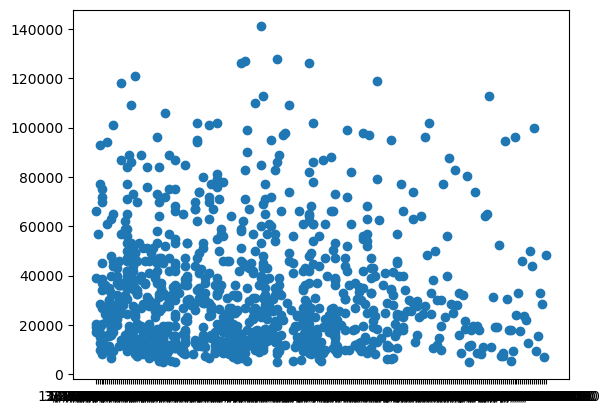

In [9]:
fig,ax = plt.subplots()
ax.scatter(data["saledate"][:1000],data["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

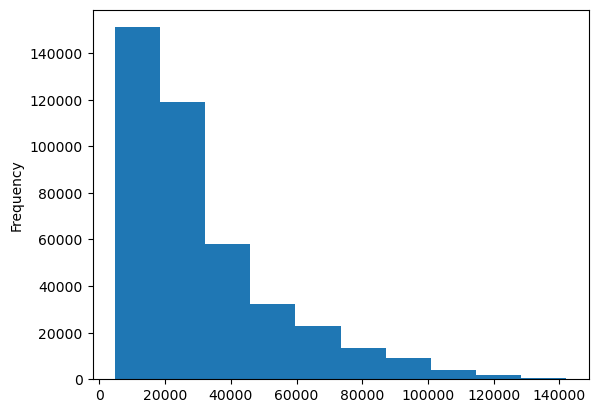

In [10]:
data.SalePrice.plot.hist()

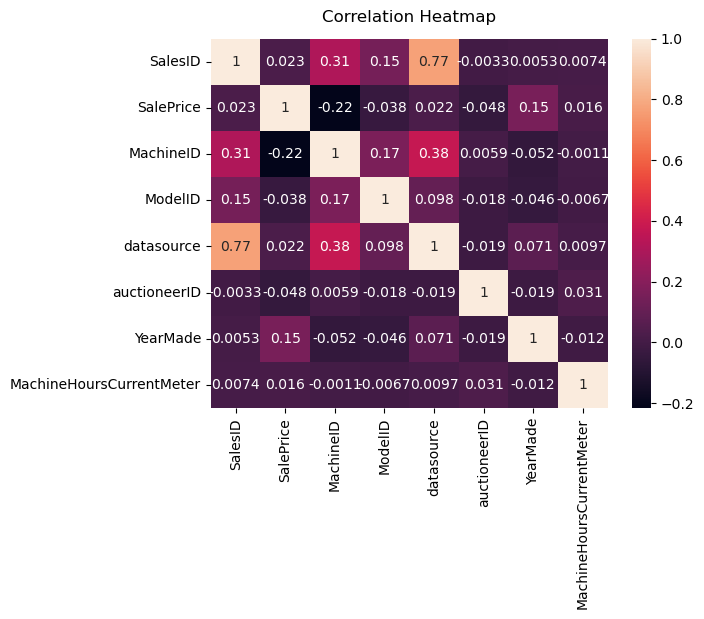

In [11]:

numeric_df = data.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()
heatmap = sns.heatmap(corr_matrix,annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Parsing Dates

we want to enrich the time and data component as much as possible . We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter

In [12]:
# Import data again but this time with parse dates
data = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [13]:
data.saledate.dtype

dtype('<M8[ns]')

In [14]:
data.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

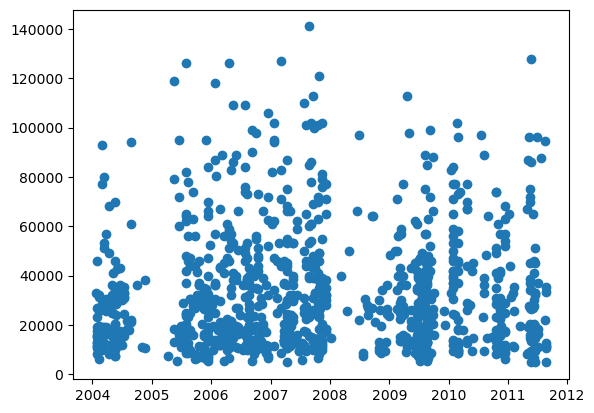

In [15]:
fig, ax = plt.subplots()
ax.scatter(data["saledate"][:1000],data["SalePrice"][:1000])

In [16]:
data.sort_values('saledate',inplace=True)

In [17]:
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
bull = data.copy()

In [19]:
bull

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
bull["saleYear"] = bull.saledate.dt.year
bull["saleMonth"] = bull.saledate.dt.month
bull["saleDay"] = bull.saledate.dt.day
bull["saleDayofWeek"] = bull.saledate.dt.dayofweek
bull["saleDayofYear"] = bull.saledate.dt.dayofyear

In [21]:
bull.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
bull.drop('saledate',axis = 1,inplace=True)

In [23]:
bull.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [24]:
bull.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: object

In [25]:
bull.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [26]:
ff =bull.SalePrice.max()

In [27]:
bull[(bull['SalePrice'] == ff)].T

,124803,124806,4878,21489,22900
SalesID,1470232,1470274,1155699,1213536,1218767
SalePrice,142000.0,142000.0,142000.0,142000.0,142000.0
MachineID,1178561,511258,790302,276541,556175
ModelID,3372,3372,23929,23931,23931
datasource,132,132,121,121,121
auctioneerID,2.0,2.0,3.0,3.0,3.0
YearMade,1996,1997,2005,2006,2005
MachineHoursCurrentMeter,NaN,NaN,1558.0,7387.0,4306.0
UsageBand,NaN,NaN,Medium,High,Medium
fiModelDesc,14H,14H,135HNA,140HNA,140HNA


In [28]:
from collections import Counter

def get_sum(bull):
    op = Counter()
    for state, price in zip(bull['state'], bull['SalePrice']):
        op[state] += price
    return op

In [29]:
from collections import Counter
lol = Counter()
lol = get_sum(bull)

In [30]:
lol

Counter({'Florida': 2314967360.0,
         'Texas': 1751418579.0,
         'California': 887330248.0,
         'Georgia': 472141800.0,
         'Washington': 449199050.0,
         'Mississippi': 431287600.0,
         'Maryland': 381298050.0,
         'Colorado': 366365660.0,
         'Alabama': 364733469.0,
         'Ohio': 349153375.0,
         'New Jersey': 345637299.0,
         'North Carolina': 342072625.0,
         'Illinois': 335716850.0,
         'Tennessee': 327943490.0,
         'South Carolina': 297026350.0,
         'Arizona': 295554600.0,
         'Pennsylvania': 260588370.0,
         'Nevada': 251854100.0,
         'Connecticut': 240076900.0,
         'New York': 221004950.0,
         'Minnesota': 214464550.0,
         'Missouri': 208492193.0,
         'Louisiana': 200147950.0,
         'Kentucky': 159542100.0,
         'Maine': 133397700.0,
         'New Mexico': 122120150.0,
         'Arkansas': 113690814.0,
         'Utah': 104144409.0,
         'Indiana': 100627075.0,


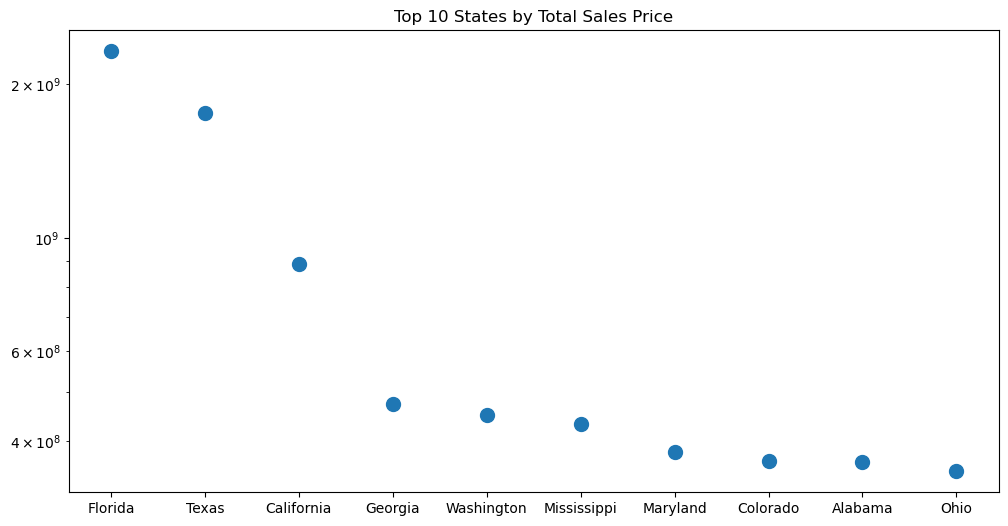

In [31]:

top_states = (pd.Series(lol)          # Convert dict to pandas Series
              .sort_values(ascending=False)  # Sort by value (highest first)
              .head(10))
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(top_states.index, top_states.values, s=100)  # s= increases dot size
ax.set_title('Top 10 States by Total Sales Price')
ax.set_yscale('log')

# Convert Strings into categories

In [32]:
pd.api.types.is_string_dtype(bull.SalePrice)

False

In [33]:
pd.api.types.is_string_dtype(bull.UsageBand)

False

In [34]:
for label,content in bull.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        bull[label] = content.astype("category").cat.as_ordered()
    

In [35]:
bull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [36]:
bull.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
bull.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [38]:
bull.to_csv('categorical_data.csv',index=False)

In [39]:
tmp = pd.read_csv('categorical_data.csv',low_memory= False)
tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


# Fill missing numerical values 

In [40]:
for label, content in tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [41]:
for label, content in tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().any():  # Check if there are any missing values
            tmp[label+"is_missing"] = content.isnull()
            tmp[label] = content.fillna(content.median())  # Fill NaN with mean

In [42]:
for label, content in tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().any():
            print(label)

In [43]:
for label, content in tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().any():
            print(label)

In [44]:
tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [45]:
tmp["auctioneerIDis_missing"].value_counts()

auctioneerIDis_missing
False    392562
True      20136
Name: count, dtype: int64

In [46]:
for label,content in bull.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
# Turn Categorical values into numbers and fill missing ones
for label, content in bull.items():
    if not pd.api.types.is_numeric_dtype(content):
        bull[label +"is_missing"] = content.isnull()
        bull[label]= pd.Categorical(content).codes + 1

In [48]:
pd.Categorical(bull['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [49]:
bull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(44), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 72.4 MB


In [50]:
bull.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 101, dtype: int64

In [51]:
bull.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [52]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(bull.drop('SalePrice',axis=1), bull.SalePrice)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [53]:
model.score(bull.drop('SalePrice',axis=1), bull.SalePrice)

0.9874090621835574

In [54]:
bull.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [55]:
valid_ds = bull[bull.saleYear == 2012]
train_ds = bull[bull.saleYear !=2012]

len(valid_ds) , len(train_ds)

(11573, 401125)

In [56]:
x_train, y_train = train_ds.drop('SalePrice',axis=1), train_ds.SalePrice
x_valid,y_valid = valid_ds.drop('SalePrice',axis=1), valid_ds.SalePrice

In [57]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error

def rmsle(y_test,y_preds):

    return np.sqrt(mean_squared_log_error(y_test,y_preds))
    
def show_scores(model):
    train_preds =model.predict(x_train)
    valid_preds = model.predict(x_valid)

    scores = {"Train MAE": mean_absolute_error(train_preds,y_train),"Valid MAE": mean_absolute_error(valid_preds,y_valid), "Train RMSE": rmsle(y_train,train_preds), "Valid RMSE": rmsle(y_valid,valid_preds)
    }
    return scores

In [58]:
# this takes far too long for experimenting
# %%time

# model = RandomForestRegressor(n_jobs = -1,random_state=42)

# 



 # Testing the model on a reduced data sample to tune the hyperparameters easily 

In [59]:
# model.fit(x_train[:10000],y_train[:10000]) -> we can slice our training data , however we can do another way also

# change max_samples value

model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples = 10000)

In [60]:
%%time 

model.fit(x_train,y_train)

CPU times: total: 49.2 s
Wall time: 5.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [61]:
res = show_scores(model)

In [62]:
print(res)

{'Train MAE': 5567.359673609638, 'Valid MAE': 7163.973915147325, 'Train RMSE': np.float64(0.2580061247936859), 'Valid RMSE': np.float64(0.29308299540056887)}


 # HyperParamter Tuning with RandomizedSearchCV 

In [63]:
%%time

from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters
rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=5,cv=5,verbose=True)

rs_model.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Fares\Downloads\time_series\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fares\Downloads\time_series\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fares\Downloads\time_series\env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Fares\Downloads\time_series\env\Lib\site

CPU times: total: 2min 27s
Wall time: 30.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [64]:
rs_model.best_params_

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(5),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [65]:
show_scores(rs_model)

{'Train MAE': 6989.894188193701,
 'Valid MAE': 8142.369208856023,
 'Train RMSE': np.float64(0.31038750489687383),
 'Valid RMSE': np.float64(0.3275817152355752)}

# Train a model with the best hyperparameters 

# These were found after a 100 iterations of RandomizedSearchCV

In [66]:
%%time 

# Most ideal hyperparamters

ideal_model = RandomForestRegressor(n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None)
ideal_model.fit(x_train,y_train)

CPU times: total: 4min 25s
Wall time: 27.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [67]:
show_scores(ideal_model)

{'Train MAE': 2960.4554196171075,
 'Valid MAE': 5948.729710264843,
 'Train RMSE': np.float64(0.1450110785290983),
 'Valid RMSE': np.float64(0.24658442596484026)}

In [68]:
df = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',low_memory=False,parse_dates=['saledate'])
df.T

,0,1,2,3,4,5,6,7,8,9,...,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456
SalesID,1227829,1227844,1227847,1227848,1227863,1227870,1227871,1227879,1227880,1227881,...,6643158,6643164,6643167,6643168,6643170,6643171,6643173,6643184,6643186,6643196
MachineID,1006309,1022817,1031560,56204,1053887,1068694,1012262,1064696,1067175,1007429,...,2556488,1894070,2558314,2558315,2558316,2558317,2558332,2558342,2558343,2558346
ModelID,3168,7271,22805,1269,22312,16747,9133,4699,22145,423,...,21434,21438,21450,21450,21450,21450,21434,21437,21437,21446
datasource,121,121,121,121,121,121,121,121,121,121,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,3,3,3,3,3,3,3,3,3,3,...,99,99,2,2,2,2,2,2,2,2
YearMade,1999,1000,2004,2006,2005,2007,2005,1000,1000,2000,...,2004,2005,2005,2005,2006,2008,2005,1000,2006,2008
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0,3670.0,6759.0,0.0,5528.0,10572.0,...,NaN,2233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,Low,High,Medium,High,Low,High,High,NaN,Low,Medium,...,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,2012-05-03 00:00:00,...,2012-10-13 00:00:00,2012-10-27 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-10-24 00:00:00,2012-09-19 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K,WB146-5,WB140,544E,650GIV,PC228USLC2,...,28N,35NX,80NX3,80NX3,80NX3,80NX3,28N,35N,35N,55N2


In [69]:
def preprocess_data(df):
    df.sort_values('saledate',inplace=True)
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear

    df.drop('saledate',axis = 1,inplace=True)

    for label,content in df.items():
        
        if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
            
            df[label] = content.astype("category").cat.as_ordered()
    
    for label, content in df.items():
        
        if pd.api.types.is_numeric_dtype(content):
            
            if content.isnull().any():
                # Check if there are any missing values
                df[label+"is_missing"] = content.isnull()
                df[label] = content.fillna(content.median())
    
    for label, content in df.items():
        
        if not pd.api.types.is_numeric_dtype(content):
            
            df[label +"is_missing"] = content.isnull()
            df[label]= pd.Categorical(content).codes + 1

    return df
    

In [70]:

res = preprocess_data(df)

In [71]:
res.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


In [72]:
x_train.shape

(401125, 100)

In [73]:
set(res.columns) - set(x_train.columns) 

{'MachineHoursCurrentMeteris_missing'}

In [74]:
res.drop('MachineHoursCurrentMeteris_missing',axis =1 ,inplace=True)

In [75]:
test_preds = ideal_model.predict(res)

In [76]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = res["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
1408,4317459,10823.606867
1023,4249784,18006.686082
1728,4392603,22059.911636
1167,4274831,30768.837852
1594,4362801,14412.797861
...,...,...
9941,6620191,7098.537795
9936,6620142,11884.028191
11620,6635116,46320.392204
9995,6621460,45809.369579


In [77]:
df_preds.to_csv('final_predictions.csv',index=False)

# Feature importance seeks to find out which different attributes of data when it comes to predicitng **target variable** SalePrice

In [79]:
# Find feature importance of our best model 

len(ideal_model.feature_importances_)

100

In [80]:
x_train.shape

(401125, 100)

In [84]:
importances = pd.DataFrame({
    'Feature': res.columns,
    'Importance': ideal_model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
5,YearMade,0.197233
13,ProductSize,0.155682
51,saleYear,0.073046
10,fiSecondaryDesc,0.072387
19,Enclosure,0.061703
...,...,...
65,ProductGroupis_missing,0.000000
57,fiModelDescis_missing,0.000000
58,fiBaseModelis_missing,0.000000
64,stateis_missing,0.000000


In [91]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, 
                       "feature_importances": importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize=(10, 8))  # Added figure size for better visibility
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.invert_yaxis() 
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.set_title(f"Top {n} Features")  # Added title for context
    plt.tight_layout()  # Prevent label cutoff
    plt.show()

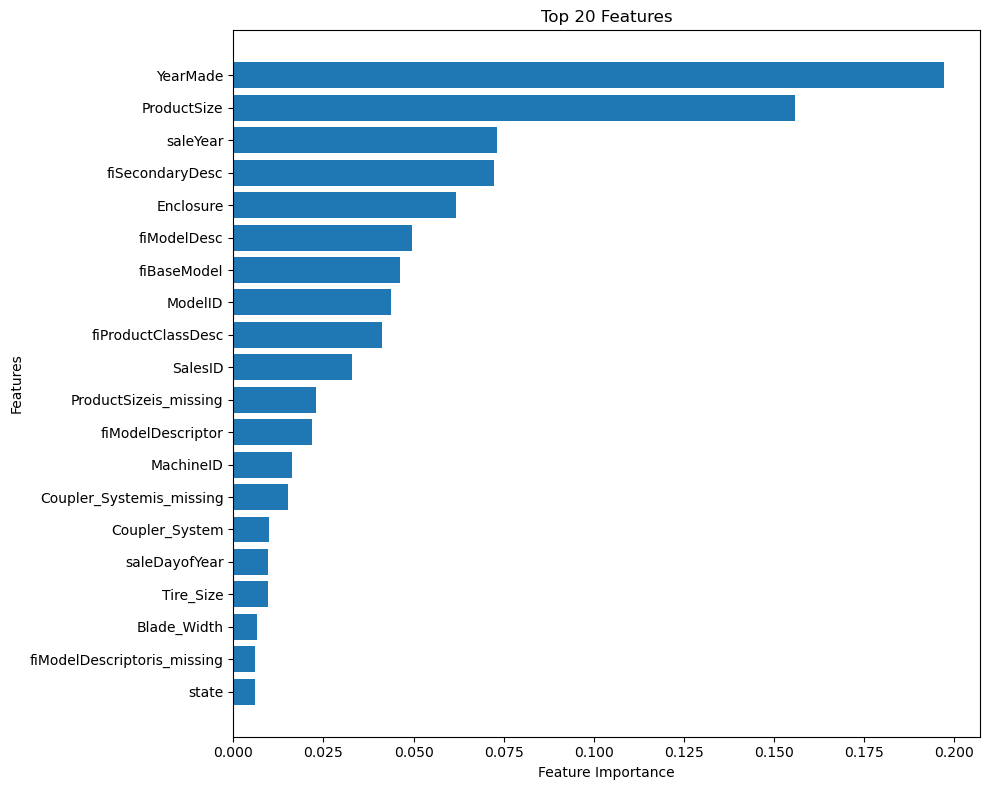

In [92]:
plot_features(x_train.columns,ideal_model.feature_importances_)